In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats import weightstats as stests
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [7]:
df=pd.read_csv('bike_sharing.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [8]:
df.shape

(10886, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [12]:
df['datetime']=pd.to_datetime(df['datetime'])

<Axes: xlabel='season', ylabel='Count'>

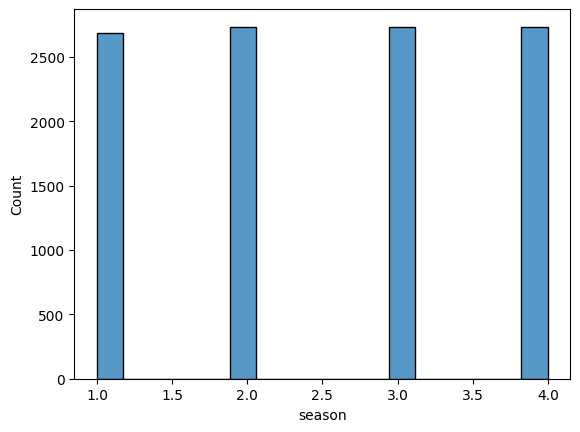

In [13]:
sns.histplot(df['season'])

<Axes: ylabel='season'>

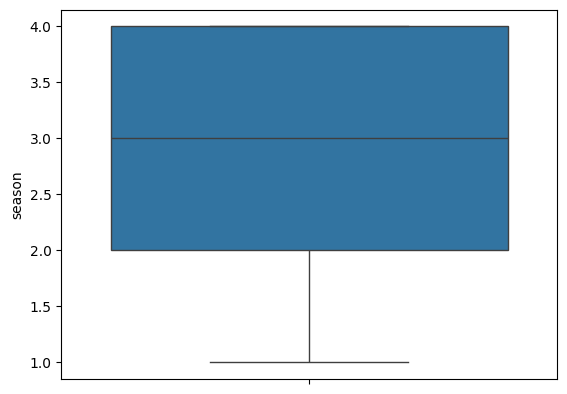

In [14]:
sns.boxplot(df['season'])

<Axes: xlabel='holiday', ylabel='Count'>

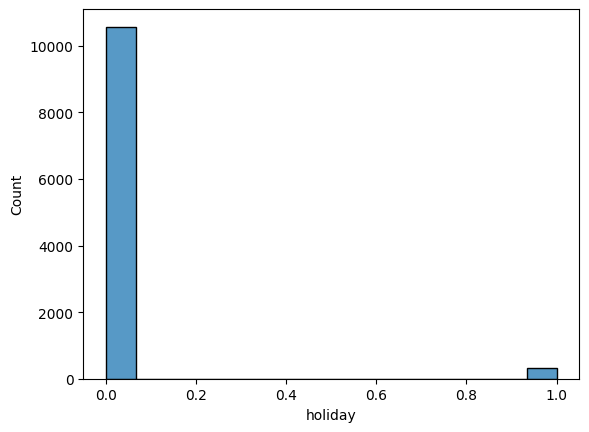

In [15]:
sns.histplot(df['holiday'])

<Axes: xlabel='temp', ylabel='Count'>

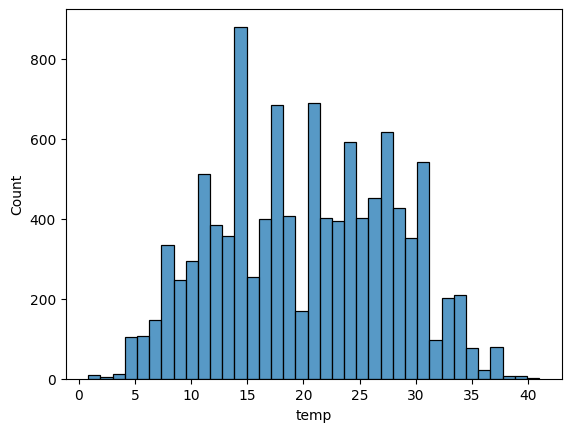

In [16]:
sns.histplot(df['temp'])

<Axes: ylabel='temp'>

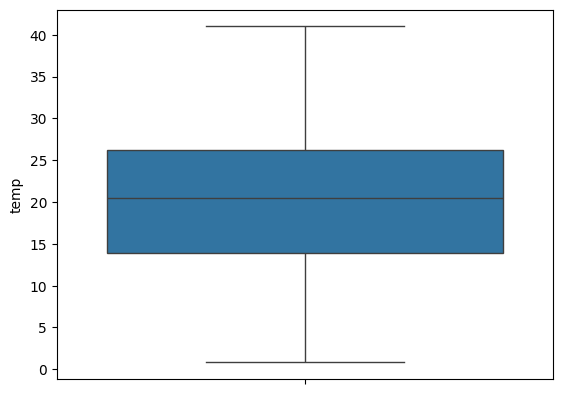

In [17]:
sns.boxplot(df['temp'])

<Axes: xlabel='atemp', ylabel='Count'>

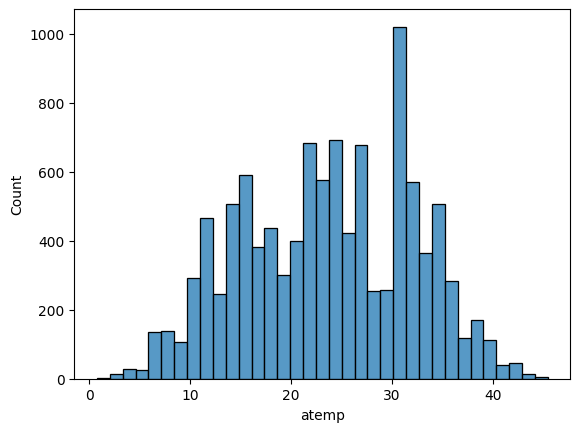

In [18]:
sns.histplot(df['atemp'])

<Axes: ylabel='atemp'>

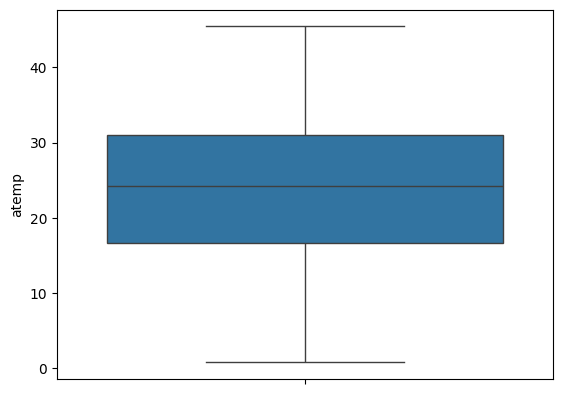

In [19]:
sns.boxplot(df['atemp'])

<Axes: xlabel='humidity', ylabel='Count'>

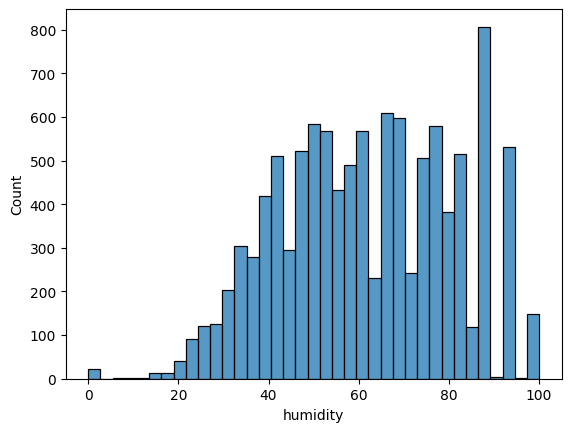

In [20]:
sns.histplot(df['humidity'])

<Axes: ylabel='humidity'>

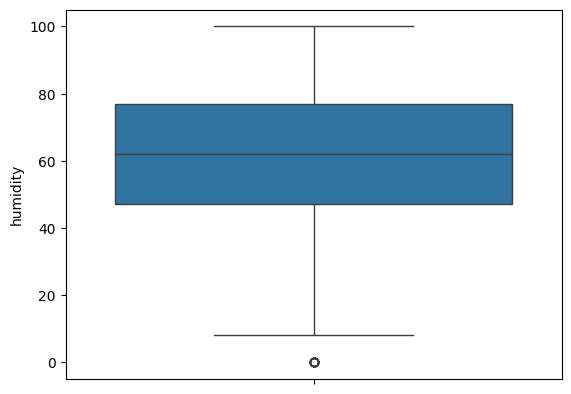

In [21]:
sns.boxplot(df['humidity'])

<Axes: xlabel='windspeed', ylabel='Count'>

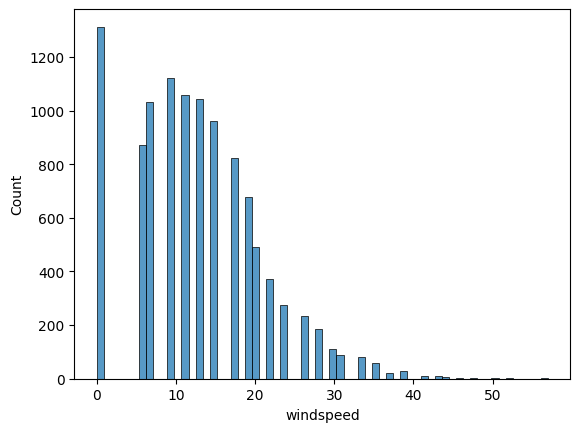

In [22]:
sns.histplot(df['windspeed'])

<Axes: ylabel='windspeed'>

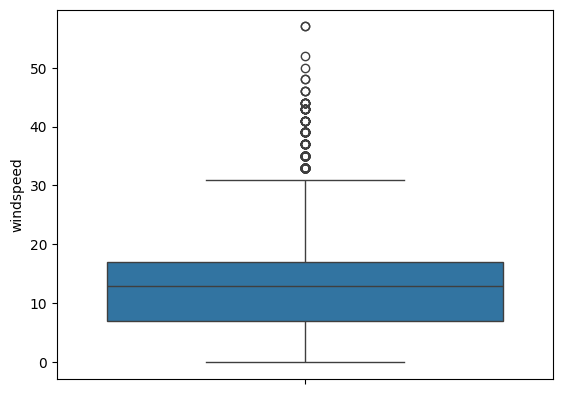

In [23]:
sns.boxplot(df['windspeed'])

In [24]:
iqr=np.percentile(df['windspeed'],75)-np.percentile(df['windspeed'],25)
print(iqr)
upper=np.percentile(df['windspeed'],75)+(1.5*iqr)
lower=np.percentile(df['windspeed'],25)-(1.5*iqr)
len(df[df['windspeed']<lower])
df['windspeed']=df['windspeed'].clip(upper=np.percentile(df['windspeed'],95))

9.996400000000001


<Axes: xlabel='casual', ylabel='Count'>

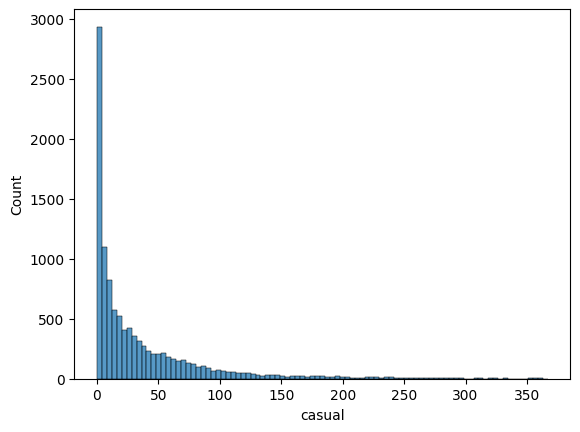

In [25]:
sns.histplot(df['casual'])

<Axes: ylabel='casual'>

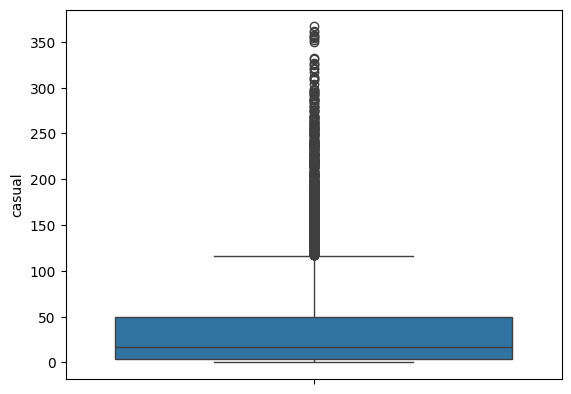

In [26]:
sns.boxplot(df['casual'])

In [27]:
iqr=np.percentile(df['casual'],75)-np.percentile(df['casual'],25)
print(iqr)
upper=np.percentile(df['casual'],75)+(1.5*iqr)
lower=np.percentile(df['casual'],25)-(1.5*iqr)
df['casual']=df['casual'].clip(upper=np.percentile(df['casual'],95))

45.0


<Axes: ylabel='casual'>

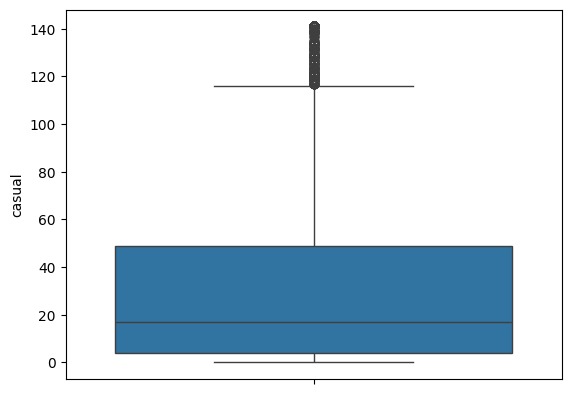

In [28]:
sns.boxplot(df['casual'])

<Axes: xlabel='registered', ylabel='Count'>

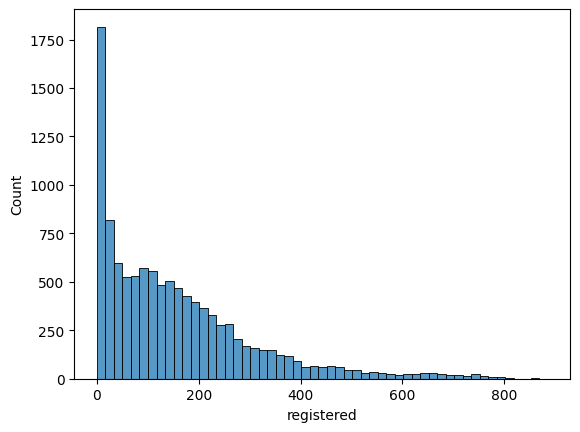

In [29]:
sns.histplot(df['registered'])

<Axes: ylabel='registered'>

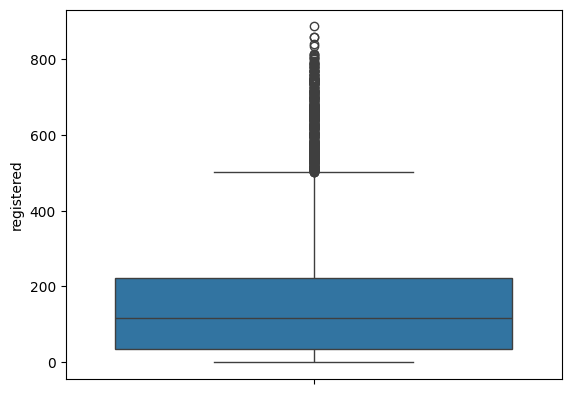

In [30]:
sns.boxplot(df['registered'])

In [31]:
iqr=np.percentile(df['registered'],75)-np.percentile(df['registered'],25)
print(iqr)
upper=np.percentile(df['registered'],75)+(1.5*iqr)
lower=np.percentile(df['registered'],25)-(1.5*iqr)
df['registered']=df['registered'].clip(upper=np.percentile(df['registered'],95))

186.0


<Axes: ylabel='registered'>

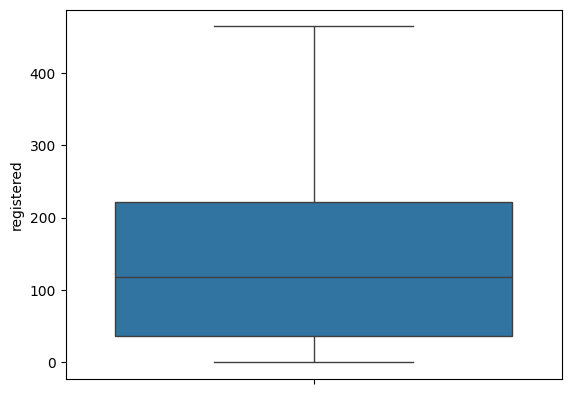

In [32]:
sns.boxplot(df['registered'])

<Axes: xlabel='count', ylabel='Count'>

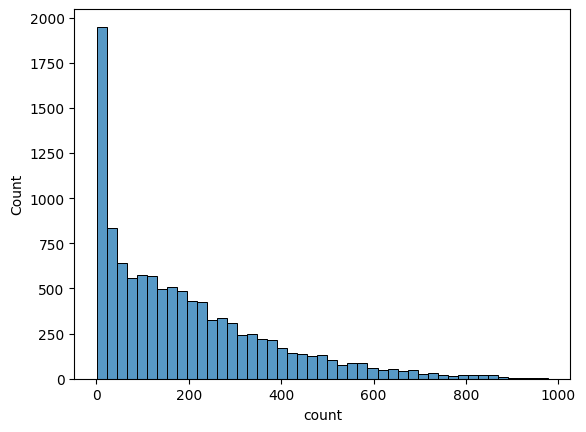

In [33]:
sns.histplot(df['count'])

<Axes: ylabel='count'>

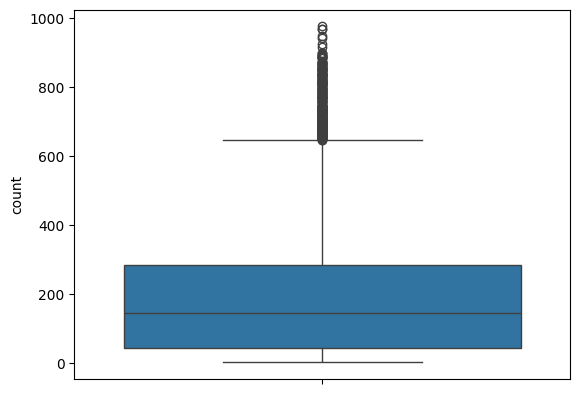

In [34]:
sns.boxplot(df['count'])

In [35]:
iqr=np.percentile(df['count'],75)-np.percentile(df['count'],25)
print(iqr)
upper=np.percentile(df['count'],75)+(1.5*iqr)
lower=np.percentile(df['count'],25)-(1.5*iqr)
df['count']=df['count'].clip(upper=np.percentile(df['count'],95))

242.0


<Axes: ylabel='count'>

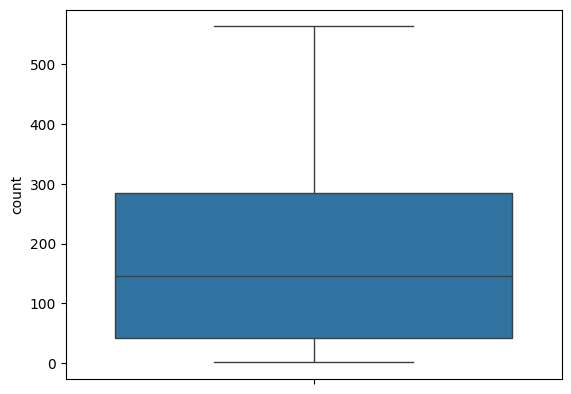

In [36]:
sns.boxplot(df['count'])

Check if there any significant difference between the no. of bike rides on Weekdays
and Weekends?

In [37]:
weekends=df[df['workingday']==0]
weekends=weekends['count']
workeday=df[df['workingday']==1]
workeday=workeday['count']

In [38]:
weekends

,count
0,16.0
1,40.0
2,32.0
3,13.0
4,1.0
...,...
10809,109.0
10810,122.0
10811,106.0
10812,89.0


In [39]:
stests.ztest(x1=weekends,x2=workeday,value=0,alternative='two-sided')

(np.float64(0.10174388743419625), np.float64(0.9189599657404938))

In [40]:
t,p=ttest_ind(weekends,workeday)

In [41]:
if p>0.05:
  print("there is no significal difference ")
else:
  print("ther is significant difference")

there is no significal difference 


Check if the demand of bicycles on rent is the same for different Weather
conditions?

In [42]:
df['weather'].unique()

array([1, 2, 3, 4])

In [43]:
w1=df[df['weather']==1]['count']
w2=df[df['weather']==2]['count']
w3=df[df['weather']==3]['count']
w4=df[df['weather']==4]['count']

In [44]:
f,p=f_oneway(w1,w2,w3,w4)

In [45]:
if p>0.05:
  print('despite different weather demand for bycecle is same')
else:
  print('demand of bicycles on rent is the different for different Weather conditions')

demand of bicycles on rent is the different for different Weather conditions


even our null hypothis is fail we will check it if data is come from normal distribution or not

In [46]:
from scipy.stats import shapiro
import statsmodels.api as sm
from scipy.stats import kruskal

In [ ]:
t,p=shapiro(w1)

In [48]:
if p>0.05:
  print('normal distribution')
else:
  print('not normal distributed')

not normal distributed


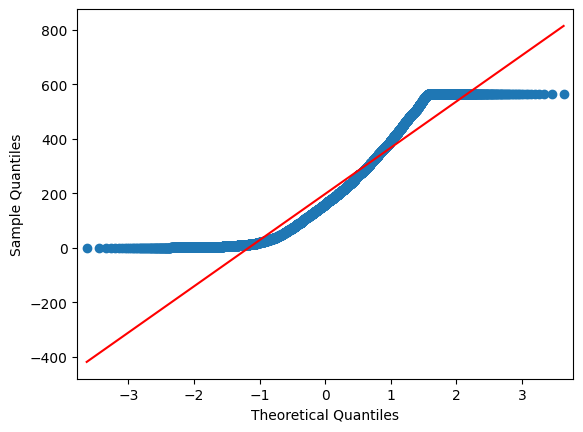

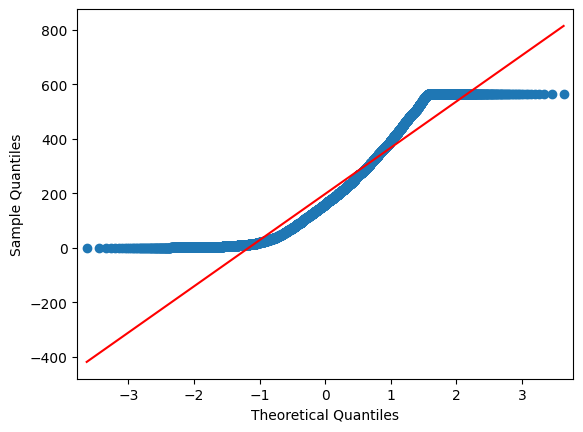

In [49]:
sm.qqplot(w1,line='s')

In [50]:
t,p=shapiro(w2)
print(p)
if p>0.05:
  print('normal distribution')
else:
  print('not normal distributed')

1.7129341543252695e-40
not normal distributed


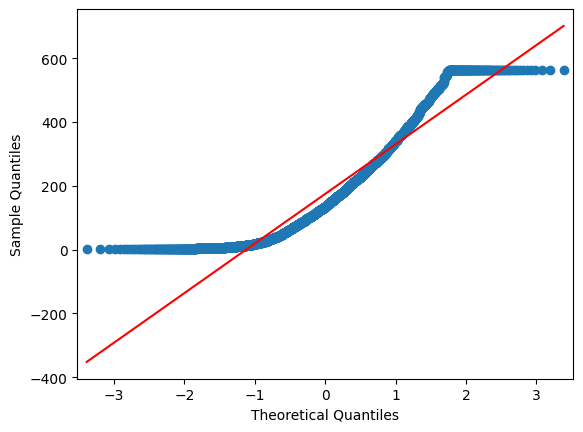

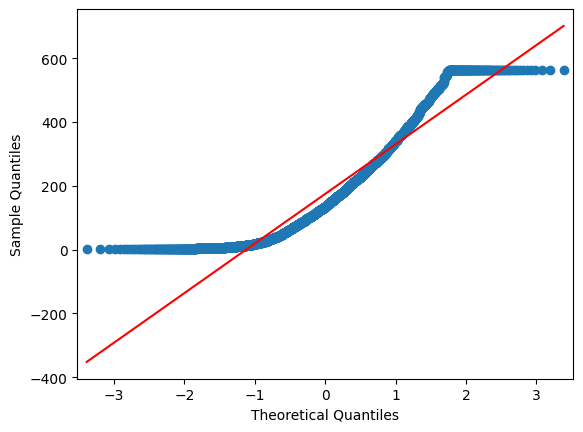

In [51]:
sm.qqplot(w2,line='s')

In [52]:
t,p=shapiro(w3)
print(p)
if p>0.05:
  print('normal distribution')
else:
  print('not normal distributed')

3.7800262723976e-31
not normal distributed


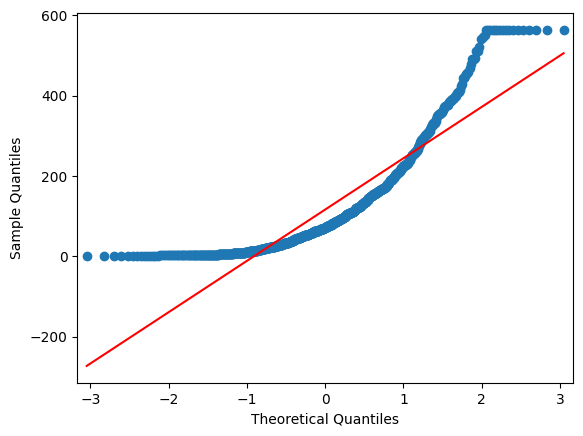

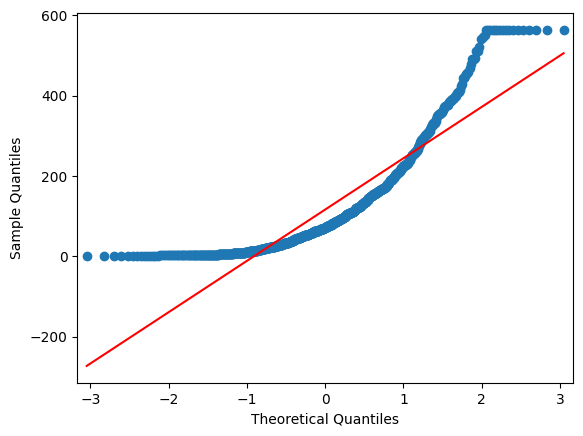

In [53]:
sm.qqplot(w3,line='s')

In [ ]:
t,p=shapiro(w4)
print(p)
if p>0.05:
  print('normal distribution')
else:
  print('not normal distributed')

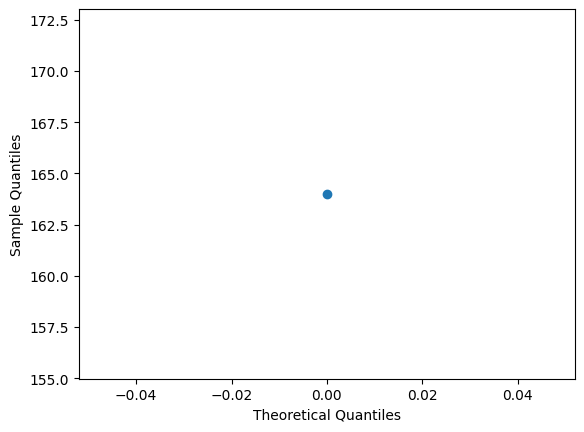

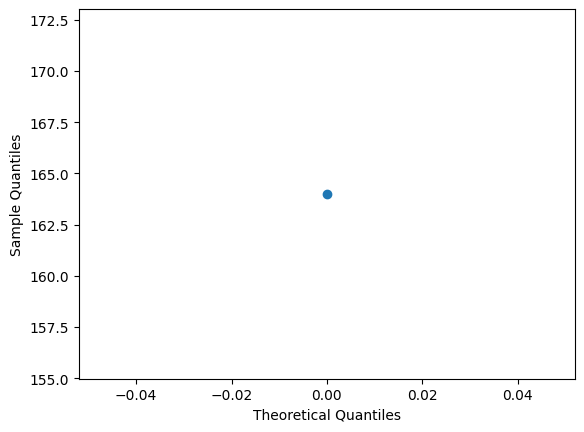

In [55]:
sm.qqplot(w4,line='s')

all the columns are not normally distributed so we will do krukal test

In [56]:
k,p=kruskal(w1,w2,w3,w4)
print(p)
if p>0.05:
  print('despite different weather demand for bycecle is same')
else:
  print('demand of bicycles on rent is the different for different Weather conditions')

3.398291245315154e-44
demand of bicycles on rent is the different for different Weather conditions


In [57]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336.0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241.0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168.0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129.0


In [58]:
df['season'].unique()

array([1, 2, 3, 4])

In [59]:
spring=df[df['season']==1]['count']
summer=df[df['season']==2]['count']
fall=df[df['season']==3]['count']
winter=df[df['season']==4]['count']

In [60]:
f,p=f_oneway(spring,summer,fall,winter)
print(p)
if p>0.05:
  print('despite different seasons demand for bycecle is same')
else:
  print('demand of bicycles on rent is the different for different seasons')


5.694659125221749e-156
demand of bicycles on rent is the different for different seasons


even our null hypothis is fail we will check it if data is come from normal distribution or not

In [61]:
t,p=shapiro(spring)
print(p)
if p>0.05:
  print('normal distribution')
else:
  print('not normal distributed')

1.558248042891504e-47
not normal distributed


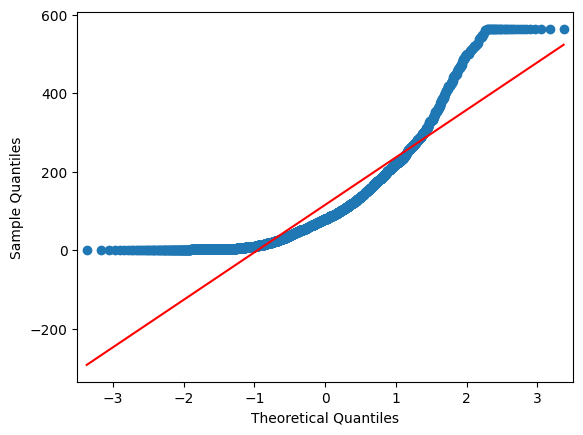

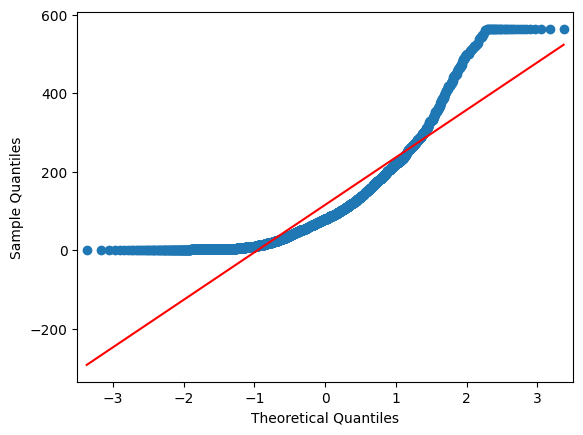

In [62]:
sm.qqplot(spring,line='s')

In [63]:
t,p=shapiro(summer)
print(p)
if p>0.05:
  print('normal distribution')
else:
  print('not normal distributed')

2.790277409010242e-38
not normal distributed


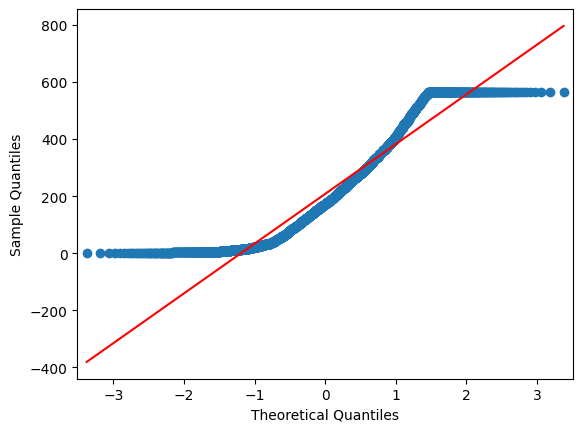

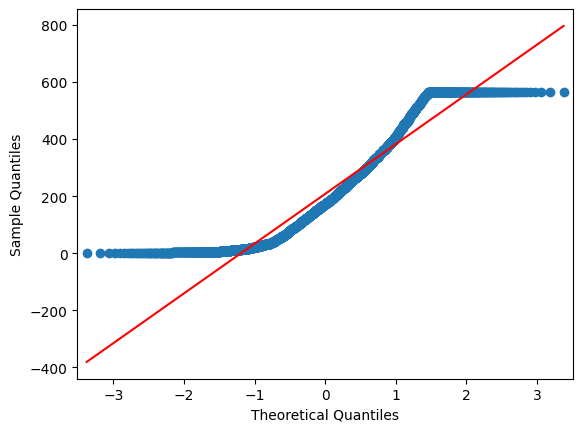

In [64]:
sm.qqplot(summer,line='s')

In [65]:
t,p=shapiro(fall)
print(p)
if p>0.05:
  print('normal distribution')
else:
  print('not normal distributed')

5.493394628640575e-35
not normal distributed


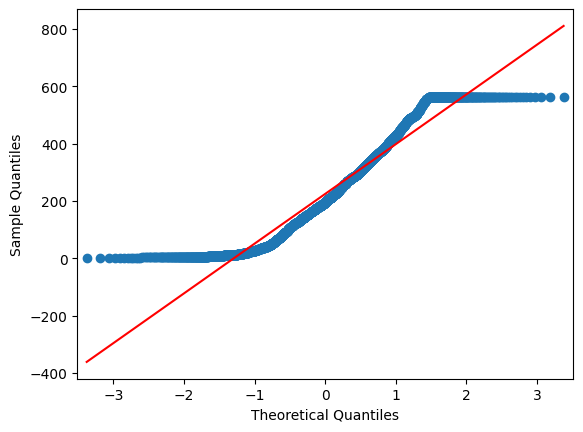

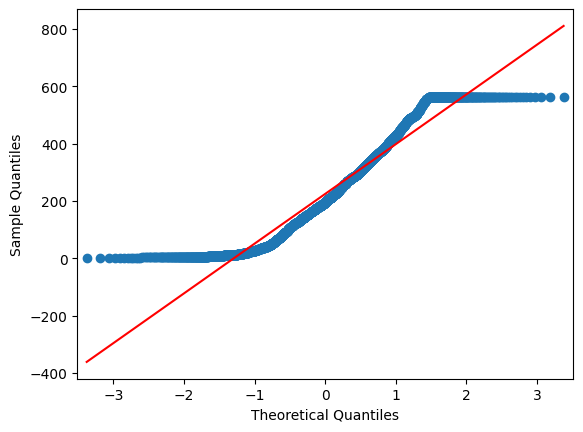

In [66]:
sm.qqplot(fall,line='s')

In [67]:
t,p=shapiro(winter)
print(p)
if p>0.05:
  print('normal distribution')
else:
  print('not normal distributed')

1.8833875793512036e-37
not normal distributed


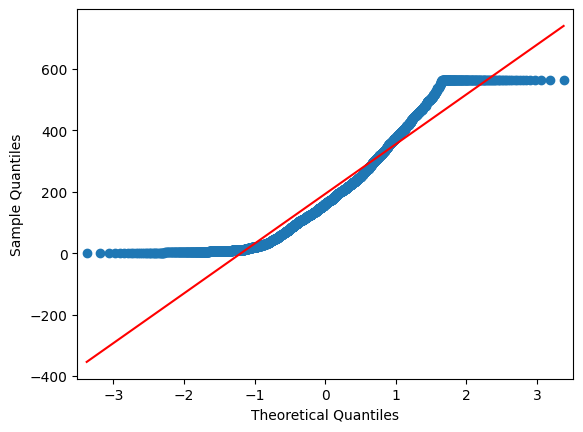

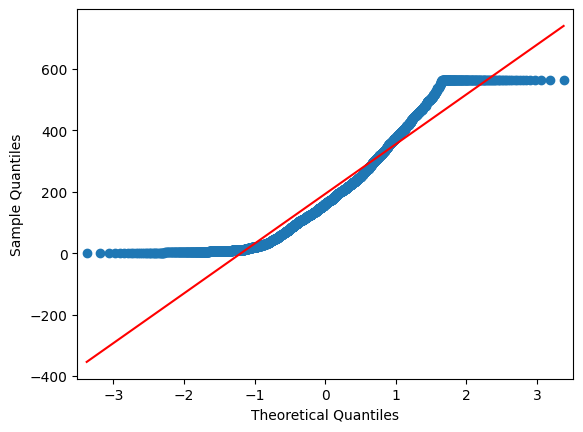

In [68]:
sm.qqplot(winter,line='s')

In [69]:
k,p=kruskal(spring,summer,fall,winter)
print(p)
if p>0.05:
  print('despite different season demand for bycecle is same')
else:
  print('demand of bicycles on rent is the different for different seasons')

3.619581072868809e-151
demand of bicycles on rent is the different for different seasons


In [70]:
df.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

Check if the Weather conditions are significantly different during different Seasons?

In [71]:
s1=pd.crosstab(df['weather'],df['season'])
s1


season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [72]:
chi2_contingency(s1)

Chi2ContingencyResult(statistic=np.float64(49.15865559689363), pvalue=np.float64(1.5499250736864862e-07), dof=9, expected_freq=array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]]))

In [73]:
if 1.5499250736864862e-07>0.05:
  print('no significant difference')
else:
  print('signinficant difference')


signinficant difference


Business Conclusions
Demand stability across weekdays/weekends:
Since there’s no difference, operations (bike supply, staffing, maintenance) can be kept uniform across the week.
Weather-sensitive demand:
Weather is a major driver of demand. Rain, snow, or extreme conditions reduce rentals, so bikes may be underutilized in such times.
Seasonal fluctuations:
Some seasons naturally bring higher demand (likely summer and fall). Winter and extreme weather periods bring low demand.
Season-weather relationship:
Seasons strongly influence weather, and in turn, weather drives demand. Thus, demand forecasting should combine both season and weather data.

1-Bike Allocation & Maintenance
Maintain a consistent fleet size across weekdays and weekends, since demand is similar.
2-During low-demand weather/season (rainy or winter), reduce active fleet and schedule bike maintenance.
Dynamic Pricing Strategy
Offer discounts or promotions during bad weather to encourage ridership.
Introduce peak pricing in summer/fall when demand is naturally high.
3-Marketing & Promotions
Run seasonal campaigns (e.g., summer fitness rides, autumn scenic tours).
Partner with cafes/parks for bundled offers during high-demand seasons.
Operational Planning
Use weather forecasts to adjust operations:
Fewer bikes deployed during expected storms/rain.
Extra bikes available on clear/sunny weekends.
4-ustomer Experience
Provide weather-related safety gear (helmets, ponchos for rain) or partner with local vendors.
Create membership incentives to retain both casual and registered riders throughout the year.